In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\bhumu\Downloads\housing.csv")

In [3]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [5]:
num_df = df[["RM","LSTAT","PTRATIO"]]

In [6]:
num_df

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


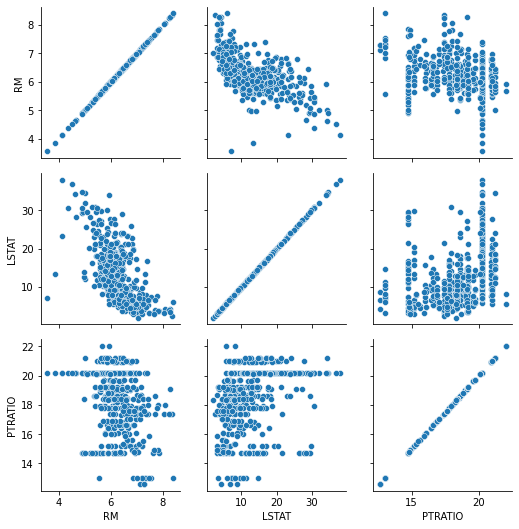

In [7]:
h = sns.PairGrid(num_df)
h.map(sns.scatterplot)

## Spliting dependent and independent variables

In [8]:
X = df[["RM","LSTAT","PTRATIO"]]

In [9]:
X

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [10]:
y = df["MEDV"]

In [11]:
y

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
X_train

,RM,LSTAT,PTRATIO
307,6.382,10.36,18.4
58,6.145,6.86,19.7
424,6.406,19.52,20.2
78,6.232,12.34,18.7
439,5.976,19.01,20.2
...,...,...,...
255,7.206,8.10,13.0
72,6.065,5.52,19.2
396,5.155,20.08,20.2
235,6.393,5.19,16.6


In [14]:
X_test

,RM,LSTAT,PTRATIO
457,5.427,18.14,20.2
107,6.127,14.09,20.9
165,6.402,11.32,14.7
197,7.853,3.81,14.7
446,6.513,10.29,20.2
...,...,...,...
92,6.442,8.16,18.2
385,6.404,20.31,20.2
119,5.731,13.61,17.8
261,6.240,6.59,18.6


In [15]:
y_train

307    485100.0
58     489300.0
424    359100.0
78     445200.0
439    266700.0
         ...   
255    766500.0
72     478800.0
396    342300.0
235    497700.0
37     441000.0
Name: MEDV, Length: 391, dtype: float64

In [16]:
y_test

457     289800.0
107     428400.0
165     468300.0
197    1018500.0
446     424200.0
         ...    
92      480900.0
385     254100.0
119     405300.0
261     529200.0
428     247800.0
Name: MEDV, Length: 98, dtype: float64

## Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)

In [21]:
y_pred[:2], y_test[:2]

(array([304643.42627625, 390061.33246735]),
 457    289800.0
 107    428400.0
 Name: MEDV, dtype: float64)

In [22]:
r2_score(y_test, y_pred)

0.7042069943455354

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, X, y, cv = 5)

array([0.75606189, 0.63862669, 0.39700546, 0.28794665, 0.03922698])

In [24]:
np.mean(cross_val_score(regressor, X, y, cv = 5))

0.42377353266622936

## Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y)

cross_val_score(reg_poly, X_poly, y, cv = 5)

array([0.83151509, 0.72757989, 0.81757612, 0.60452096, 0.51351252])

In [32]:
np.mean(cross_val_score(reg_poly, X_poly, y, cv = 5))

0.6989409158148173

## SVM for Regression

In [62]:
from sklearn.svm import SVR
reg_svm = SVR(C = 0.25, epsilon = 1)
reg_svm.fit(X_train, y_train)

SVR(C=0.25, epsilon=1)

In [63]:
cross_val_score(reg_svm, X, y, cv = 5)

array([-0.06429981, -0.08370478, -1.36505041, -0.25263385, -1.41612363])

In [46]:
np.mean(cross_val_score(reg_svm, X, y, cv = 5))

-0.04959588719206718

In [67]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [100, 1000, 10000, 100000], 'epsilon': [0.1, 1, 2, 3, 4, 5], 'kernel': ['poly','rbf','sigmoid']}
gd = GridSearchCV(reg_svm, parameters)

In [68]:
cross_val_score(gd, X, y, cv = 5)

array([0.75380421, 0.6977057 , 0.39919405, 0.55646901, 0.41875179])

In [69]:
np.mean(cross_val_score(gd, X, y, cv = 5))

0.5651849512554362

## Decision tree for regression 

In [55]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
cross_val_score(reg_dt, X, y, cv = 5)

array([0.42676776, 0.58197301, 0.66071906, 0.50276286, 0.08807208])

In [57]:
np.mean(cross_val_score(reg_dt, X, y, cv = 5))

0.43233688874061454

## Random Forest for regression

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
cross_val_score(reg_rf, X, y, cv = 5)

array([0.71561607, 0.73250125, 0.75215617, 0.6677327 , 0.4781984 ])

In [61]:
np.mean(cross_val_score(reg_rf, X, y, cv = 5))

0.6684194466648548

In [70]:
!pip install xgboost 

In [71]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)
cross_val_score(xg, X, y, cv = 5)

array([0.5870525 , 0.68565261, 0.69983265, 0.59264697, 0.31129189])

In [72]:
np.mean(cross_val_score(xg, X, y, cv = 5))

0.5752953259649681